In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# load the appliances energy prediction data set

data = pd.read_csv('energydata_complete.csv')

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# parse as datetime data type

data['date'] = pd.to_datetime(data['date'])

In [4]:
# determine time between transactions, in this case, energy records

data['time_since_previous'] = data['date'].diff()

data['time_since_previous'] = data['time_since_previous']/np.timedelta64(1,'m')

data[['date', 'time_since_previous']].head(10)

,date,time_since_previous
0,2016-01-11 17:00:00,NaN
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,10.0
3,2016-01-11 17:30:00,10.0
4,2016-01-11 17:40:00,10.0
5,2016-01-11 17:50:00,10.0
6,2016-01-11 18:00:00,10.0
7,2016-01-11 18:10:00,10.0
8,2016-01-11 18:20:00,10.0
9,2016-01-11 18:30:00,10.0


In [5]:
# extract day and month from datetime variable

data[['day', 'month']] = pd.DataFrame([(x.day, x.month) for x in data['date']])

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,time_since_previous,day,month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,NaN,11,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,10.0,11,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,10.0,11,1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,10.0,11,1
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,10.0,11,1


In [6]:
# make the datetime variable the index of the series

data.index = data['date']

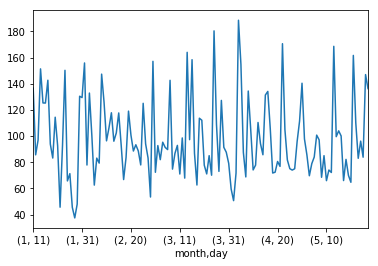

In [7]:
# Plot mean energy consumption by appliances per day
# we are going to work with this data

data.groupby(['month', 'day'])['Appliances'].mean().plot()

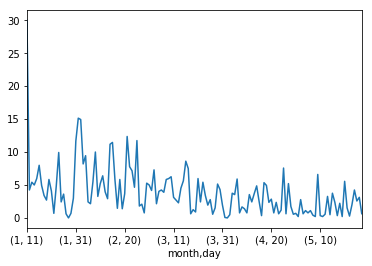

In [8]:
# Plot mean energy consumption by lights per day
# we are going to work with this data

data.groupby(['month', 'day'])['lights'].mean().plot()

In [9]:
# create pandas series with the mean energy consumption per day

# electricity consumption by appliances per day
elec_pday = data.groupby(['month', 'day'])['Appliances'].mean()

# light energy consumption per day
light_pday = data.groupby(['month', 'day'])['lights'].mean()

In [10]:
# find the peaks, that is, the local maxima

peaks, _ = find_peaks(elec_pday.values, height=60)

peaks

array([  3,   6,   9,  13,  15,  19,  21,  23,  26,  28,  32,  35,  39,
        42,  45,  49,  51,  53,  56,  59,  61,  63,  65,  68,  72,  74,
        77,  84,  88,  92,  96, 100, 102, 110, 116, 119, 121, 123, 125,
       128, 131, 134, 136], dtype=int64)

In [11]:
# compare the shape of the time series with that of the selected
# local maxima series

elec_pday.shape, elec_pday[peaks].shape

((138,), (43,))

In [12]:
# select only the values of the series with the local maxima

elec_pday[peaks]

month  day
1      14     151.388889
       17     142.708333
       20     114.444444
       24     150.277778
       26      71.319444
       30     130.486111
2      1      155.902778
       3      132.916667
       6       83.194444
       8      147.361111
       12     117.847222
       15     117.708333
       19     119.097222
       22      93.402778
       25     125.069444
       29     157.152778
3      2       92.777778
       4       95.347222
       7      142.638889
       10      92.916667
       12      98.611111
       14     164.027778
       16     158.402778
       19     113.680556
       23      85.069444
       25     180.416667
       28     127.291667
4      4      188.541667
       8      134.444444
       12     110.416667
       16     134.166667
       20      80.625000
       22     170.625000
       30     140.416667
5      6      100.763889
       9       85.069444
       11      74.097222
       13     168.611111
       15     104.027778
       18     

In [13]:
# capture the series with local maxima in a pandas dataframe
# then reset index so that the month and day become part of the columns

# finally, we need to add the year, to be able to reconstitute the date
# from the existing time columns

tmp = pd.DataFrame(elec_pday[peaks]).reset_index(drop=False)
tmp['year'] = 2016
tmp.head()

,month,day,Appliances,year
0,1,14,151.388889,2016
1,1,17,142.708333,2016
2,1,20,114.444444,2016
3,1,24,150.277778,2016
4,1,26,71.319444,2016


In [14]:
# reconstitute the datetime variable

tmp['date'] = pd.to_datetime(tmp[['year', 'month', 'day']])

tmp.head()

,month,day,Appliances,year,date
0,1,14,151.388889,2016,2016-01-14
1,1,17,142.708333,2016,2016-01-17
2,1,20,114.444444,2016,2016-01-20
3,1,24,150.277778,2016,2016-01-24
4,1,26,71.319444,2016,2016-01-26


In [15]:
# calculate the distance, in days, between the local maxima
# we do this utilizing the dataframe with only the local maxima

tmp['peak_distance'] = tmp['date'].diff()

tmp['peak_distance'] = tmp['peak_distance'].dt.days

tmp.head()

,month,day,Appliances,year,date,peak_distance
0,1,14,151.388889,2016,2016-01-14,NaN
1,1,17,142.708333,2016,2016-01-17,3.0
2,1,20,114.444444,2016,2016-01-20,3.0
3,1,24,150.277778,2016,2016-01-24,4.0
4,1,26,71.319444,2016,2016-01-26,2.0


In [16]:
# now we put all the steps together in a function

# not in book, but useful information for readers, to
# automate the calculation of peak distances across variables

def time_between_peaks(ser):

    # find local maxima
    peaks, _ = find_peaks(ser.values)

    # select the series values with local maxima only
    # transform the series into a dataframe with the month
    # and day index as columns
    tmp = pd.DataFrame(ser[peaks]).reset_index(drop=False)

    # add year to reconstitute date
    tmp['year'] = 2016

    # reconstitute date
    tmp['date'] = pd.to_datetime(tmp[['year', 'month', 'day']])

    # calculate difference in days between local maxima
    tmp['peak_distance'] = tmp['date'].diff()
    tmp['peak_distance'] = tmp['peak_distance'].dt.days

    # return difference in days between local maxima
    # that is a pandas series
    return tmp['peak_distance']

In [17]:
# return a series with a difference in days respect to the
# previous local maxima for the time series with the
# mean daily energy consumption by lights

distances = time_between_peaks(light_pday)

# display first 10 values of the series
distances[0:10]

0    NaN
1    3.0
2    4.0
3    4.0
4    2.0
5    6.0
6    3.0
7    4.0
8    3.0
9    4.0
Name: peak_distance, dtype: float64

## To determine distance between local maxima and minima

We need to calculate both, and then concatenate the arrays, and use that to select the data

In [18]:
# determine the days of minimum electricity consumption 
# throughout the 5 months, that is the local minima

# we use peak values but we turn the series upside down with the
# reciprocal function

valleys, _ = find_peaks(1 / elec_pday.values, height=(-np.Inf, 1/60))
valleys

array([  1,   5,   8,  14,  20,  22,  25,  27,  30,  33,  37,  41,  44,
        50,  52,  55,  57,  60,  62,  64,  67,  71,  73,  76,  87,  90,
        94,  98, 101, 106, 113, 118, 120, 122, 124, 127, 130, 133, 135],
      dtype=int64)

In [19]:
# compare the number of observations in the entire series
# vs the number of local maxima, vs the number of local minima

elec_pday.shape, elec_pday[peaks].shape, elec_pday[valleys].shape

((138,), (43,), (39,))

In [20]:
# concatenate the indices that contain the local minima and maxima
# and then sort its values

peaksandvalleys = np.concatenate([peaks, valleys])
peaksandvalleys.sort()
peaksandvalleys

array([  1,   3,   5,   6,   8,   9,  13,  14,  15,  19,  20,  21,  22,
        23,  25,  26,  27,  28,  30,  32,  33,  35,  37,  39,  41,  42,
        44,  45,  49,  50,  51,  52,  53,  55,  56,  57,  59,  60,  61,
        62,  63,  64,  65,  67,  68,  71,  72,  73,  74,  76,  77,  84,
        87,  88,  90,  92,  94,  96,  98, 100, 101, 102, 106, 110, 113,
       116, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 130, 131,
       133, 134, 135, 136], dtype=int64)

In [21]:
# now we use this index to select the data

elec_pday[peaksandvalleys].shape

(82,)

To determine the time elapsed between local maxima and minima, we need create a dataframe with those values executing:

    tmp = pd.DataFrame(elec_pday[peaksandvalleys]).reset_index(drop=False)

and then, 1) add the year, 2) reconstitute the date, and 3) calculate the time between the local maxima and minima, as we have done in previous cells.

## There is more

We can determine the mean difference between events for various customers or entities.

Let's work with the mock customer transactions data set as example.

In [22]:
import featuretools as ft

# load data set from feature tools
data_dict = ft.demo.load_mock_customer()

data = data_dict["transactions"].merge(
    data_dict["sessions"]).merge(data_dict["customers"])

cols = ['customer_id',
        'transaction_id',
        'transaction_time',
        'amount',
        ]

data = data[cols]

data.head()

,customer_id,transaction_id,transaction_time,amount
0,2,298,2014-01-01 00:00:00,127.64
1,2,2,2014-01-01 00:01:05,109.48
2,2,308,2014-01-01 00:02:10,95.06
3,2,116,2014-01-01 00:03:15,78.92
4,2,371,2014-01-01 00:04:20,31.54


In [23]:
# Let's first calculate the time since previous transaction for each transaction

# sort the data by transaction date and time
data.sort_values(by=['transaction_time'], ascending=True, inplace=True)

# calculate time since previous transaction in hours
data['time_since_previous'] = data['transaction_time'].diff()
data['time_since_previous'] = data['time_since_previous']/np.timedelta64(1,'h')

In [24]:
# calculate mean time between transactions per customer
# all transactions occur every 1h and 5 min in the toy data set
# so the result is a bit boring, but you get the yiest

tmp = data.groupby('customer_id')['time_since_previous'].mean()
tmp

customer_id
1    0.018056
2    0.018056
3    0.018056
4    0.018056
5    0.018056
Name: time_since_previous, dtype: float64

In [25]:
# Now, let's calculate the time between local extrema

# extract the hour of the transaction

data['hr'] = data['transaction_time'].dt.hour

data.head()

,customer_id,transaction_id,transaction_time,amount,time_since_previous,hr
0,2,298,2014-01-01 00:00:00,127.64,NaN,0
1,2,2,2014-01-01 00:01:05,109.48,0.018056,0
2,2,308,2014-01-01 00:02:10,95.06,0.018056,0
3,2,116,2014-01-01 00:03:15,78.92,0.018056,0
4,2,371,2014-01-01 00:04:20,31.54,0.018056,0


In [26]:
# now let's plot the local maxima for the time series with 
# the mean amount spent per hour ==>

# one plot per customer

# this code is intended to get the reader familiar with the data
# and therefore facilitate the understanding of the recipe code


def find_and_plot_peaks(x, customer):

    # find local maxima and minima
    peaks, _ = find_peaks(x)
    valleys, _ = find_peaks(1/x)
    
    # plot the peaks and valleys
    plt.figure(figsize=(4,3))
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")
    plt.plot(valleys, x[valleys], "x", color='red')
    plt.title('Customer number {}'.format(customer))
    plt.show()

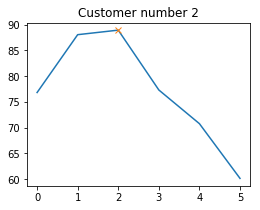

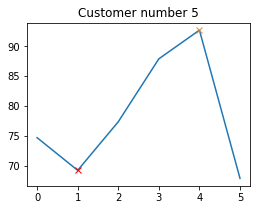

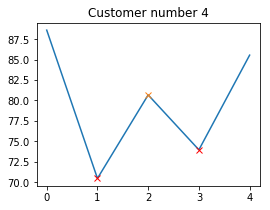

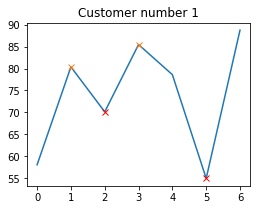

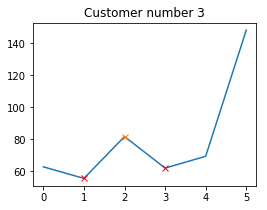

In [27]:
# make a plot per customer, with local minima and
# maxima of amount spent per hr

for customer in data['customer_id'].unique():
    tmp = data[data['customer_id']==customer]
    tmp = tmp.groupby('hr')['amount'].mean()
    tmp.reset_index(drop=True, inplace=True)
    find_and_plot_peaks(tmp, customer)


In [28]:
# create a series of functions to find the local maxima and minima
# put the arrays together, and then slice the original series into
# those values, to finally calculate the time elapsed between them

# these functions operate at a pandas series level
# x is a pandas series

def find_no_peaks(x):
    # finds number of local maxima
    peaks, _ = find_peaks(x)
    return peaks

def find_no_valleys(x):
    # finds number of local minima
    valleys, _ = find_peaks(1/x)
    return valleys

def concatenate_pav(x):
    # concatenates the indeces of the peaks and valleys
    ids = np.concatenate([find_no_peaks(x), find_no_valleys(x)])
    ids.sort()
    return ids

def slice_and_measure(x):
    # selects the points with peaks and valleys in the series
    # and determines the hr difference between them.
    # finally, returns the mean distance between
    # all local maxima and minima
    ids = concatenate_pav(x)
    tmp = pd.DataFrame(x.iloc[ids]).reset_index(drop=False)
    t = tmp['hr'].diff()
    return t.mean(skipna=True)

In [29]:
# this pandas series, df, is the argument we need for the
# precedent functions

# we use the data of customer 3 as an example to test each
# individual function

df = data[data['customer_id'] == 3]
df = df.groupby('hr')['amount'].mean()
df

hr
1     62.791333
4     55.579412
5     81.747500
6     62.019333
8     69.403939
9    148.310000
Name: amount, dtype: float64

In [30]:
# test function that finds number of peaks
peaks = find_no_peaks(df)
peaks

array([2], dtype=int64)

In [31]:
# test function that finds number of valleys
valleys = find_no_valleys(df)
valleys

array([1, 3], dtype=int64)

In [32]:
# test concatenate function

ids = concatenate_pav(df)
ids

array([1, 2, 3], dtype=int64)

In [33]:
# test result of concatenate_pav when applied to the
# entire dataset: that would be the indeces with max and min
# transaction amount per customer

data.groupby(['customer_id', 'hr'])['amount'].mean().groupby('customer_id').apply(concatenate_pav)

customer_id
1    [1, 2, 3, 5]
2             [2]
3       [1, 2, 3]
4       [1, 2, 3]
5          [1, 4]
Name: amount, dtype: object

In [34]:
# step by step the inner code of the function slide_and_measure()

tmp = pd.DataFrame(df.iloc[ids]).reset_index(drop=False)
t = tmp['hr'].diff()
t

0    NaN
1    1.0
2    1.0
Name: hr, dtype: float64

In [35]:
# output of slide_and_measure()

t.mean(skipna=True)

1.0

In [36]:
# test slide_and_measure() on 1 customer
slice_and_measure(df)

1.0

In [37]:
# apply slide_and_measure() to the entire data set

data.groupby(['customer_id', 'hr'])['amount'].mean().groupby(
    'customer_id').apply(slice_and_measure)

customer_id
1    1.666667
2         NaN
3    1.000000
4    1.000000
5    3.000000
Name: amount, dtype: float64

Compare the distances returned by our function with the peak distances in the plots in cell **23**.

Customer 2 shows np.nan, because it only contains 1 local maxima, so it is not possible to calculate distances.